In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import adjustText as aT

path_stata_input = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R9_data/stata_input/'
path_boxplots = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R9_data/plots/boxplots/'
path_starplots = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R9_data/plots/starplots/'

Box plots (by age, ses, occ_2)

In [8]:
# load data (replace with your own dataset)
r9 = pd.read_stata(path_stata_input+'r9_ivqselect_feb2023_v3_newVars.dta')
#print cols starting with tot_contacts
suffix = 'bubble'
matching_cols = [col for col in r9.columns if col.endswith(suffix)]
# Print the matching columns
print(matching_cols)
r9.head()


['work_bubble', 'school_bubble', 'comm_bubble', 'transit_bubble']


,hhkey,hhmem_key,village,site,hhid,line_num,SubmissionDate,ennum,Q101,gender_9,...,Bulilima_47,Mangwe_50,all_dists,age_5,occ_2,occ_3,occ4,occ5,day_contacts,weekday
0,1400003,1400003702,Muchena,Sakubva,3,702,2022-10-04 17:19:18,RA036,yes,Female,...,0.0,0.0,3.0,65+ yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Monday,1.0
1,1400004,1400004705,Mundembe,Sakubva,4,705,2022-09-24 17:04:00,RA049,yes,Female,...,0.0,0.0,1.0,15-29 yrs,students or teachers,schools,student,students_teachers,Friday,1.0
2,1400005,1400005702,Mundembe,Sakubva,5,702,2022-09-21 18:03:17,RA049,yes,Female,...,0.0,0.0,1.0,45-64 yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Tuesday,1.0
3,1400007,1400007901,Mundembe,Sakubva,7,901,2022-09-24 17:04:01,RA049,yes,Female,...,0.0,0.0,1.0,30-44 yrs,informal trading,blue collar/informal trade,informal_petty_trade,informal_petty_trade,Friday,1.0
4,1400009,1400009902,Mundembe,Sakubva,9,902,2022-09-27 16:32:20,RA049,yes,Female,...,0.0,0.0,1.0,30-44 yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Monday,1.0


In [9]:
r9_subset= r9[['hhmem_key', 'work_bubble', 'school_bubble', 'comm_bubble', 'transit_bubble']]
r9_subset.head()

,hhmem_key,work_bubble,school_bubble,comm_bubble,transit_bubble
0,1400003702,NaN,NaN,5.0,8
1,1400004705,50.0,50.0,90.0,18
2,1400005702,NaN,NaN,60.0,17
3,1400007901,0.0,NaN,20.0,17
4,1400009902,0.0,NaN,100.0,8


## Bubble sizes by place

In [10]:
# 0. Bubbles across places (make long)
# Reorder it following the values of the first value:
r9_subset = r9_subset.sort_values(by='hhmem_key')

# Melt the DataFrame to combine work_bubble and school_bubble
melted_df = r9_subset.melt(id_vars='hhmem_key', 
                            value_vars=['work_bubble', 'school_bubble', 'comm_bubble', 'transit_bubble'],
                            var_name='bubble_type', 
                            value_name='bubble_size')

melted_df.head()

,hhmem_key,bubble_type,bubble_size
0,1400003702,work_bubble,NaN
1,1400004701,work_bubble,0.0
2,1400004702,work_bubble,NaN
3,1400004703,work_bubble,NaN
4,1400004704,work_bubble,16.0


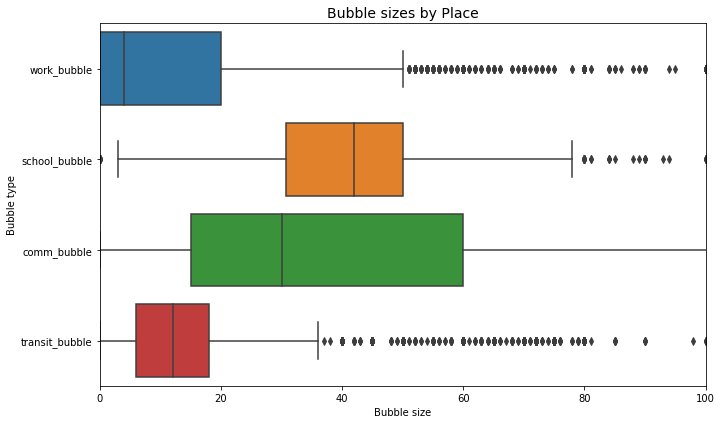

In [11]:

# Create the box plot

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='bubble_size', 
            y='bubble_type', 
            data=melted_df, 
            ax=ax)
ax.set_title("Bubble sizes by Place", loc='center', fontsize=14)
ax.set_xlabel('Bubble size')
ax.set_ylabel('Bubble type')
plt.tight_layout()
plt.xlim([0, 100])
plt.savefig(path_boxplots+'place_bubble_distributions.png', dpi=300, facecolor="white")
plt.show()

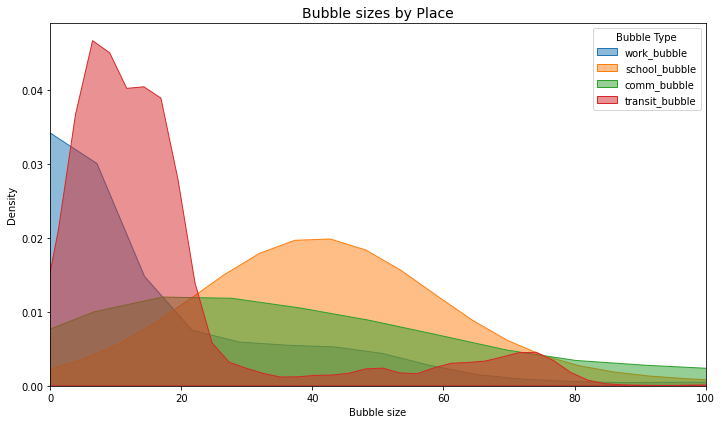

In [12]:
# Create the kernel density plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot KDE for each bubble type
bubble_types = melted_df['bubble_type'].unique()
for bubble_type in bubble_types:
    subset = melted_df[melted_df['bubble_type'] == bubble_type]
    sns.kdeplot(subset['bubble_size'], 
                ax=ax, 
                label=bubble_type, 
                shade=True, 
                alpha=0.5)

# Set titles and labels
ax.set_title("Bubble sizes by Place", loc='center', fontsize=14)
ax.set_xlabel('Bubble size')
ax.set_ylabel('Density')
plt.tight_layout()
plt.xlim([0, 100])
plt.legend(title='Bubble Type')

# Save the plot
plt.savefig(path_boxplots+'place_bubble_distributions_kde.png', dpi=300)

# Show the plot
plt.show()

### 1. Work bubbles by occupation

In [19]:

# Reorder the occupations based on the calculated means
ordered_r9 = r9.copy()

# Calculate the mean of 'work_bubble' for each 'occupation'
occupation_means = ordered_r9.groupby('occ4')['work_bubble'].mean().sort_values(ascending=False)

ordered_r9['occ4'] = pd.Categorical(ordered_r9['occ4'], categories=occupation_means.index, ordered=True)

# Reorder it following the values of the first value:
ordered_r9['occ4'] = pd.Categorical(ordered_r9['occ4'], categories=sorted(r9['occ4'].unique()), ordered=True)


ordered_r9.head()


,hhkey,hhmem_key,village,site,hhid,line_num,SubmissionDate,ennum,Q101,gender_9,...,Bulilima_47,Mangwe_50,all_dists,age_5,occ_2,occ_3,occ4,occ5,day_contacts,weekday
0,1400003,1400003702,Muchena,Sakubva,3,702,2022-10-04 17:19:18,RA036,yes,Female,...,0.0,0.0,3.0,65+ yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Monday,1.0
1,1400004,1400004705,Mundembe,Sakubva,4,705,2022-09-24 17:04:00,RA049,yes,Female,...,0.0,0.0,1.0,15-29 yrs,students or teachers,schools,student,students_teachers,Friday,1.0
2,1400005,1400005702,Mundembe,Sakubva,5,702,2022-09-21 18:03:17,RA049,yes,Female,...,0.0,0.0,1.0,45-64 yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Tuesday,1.0
3,1400007,1400007901,Mundembe,Sakubva,7,901,2022-09-24 17:04:01,RA049,yes,Female,...,0.0,0.0,1.0,30-44 yrs,informal trading,blue collar/informal trade,informal_petty_trade,informal_petty_trade,Friday,1.0
4,1400009,1400009902,Mundembe,Sakubva,9,902,2022-09-27 16:32:20,RA049,yes,Female,...,0.0,0.0,1.0,30-44 yrs,not employed or homemakers,homemakers or not working,unemployed_not_ag,unemployed_not_ag,Monday,1.0


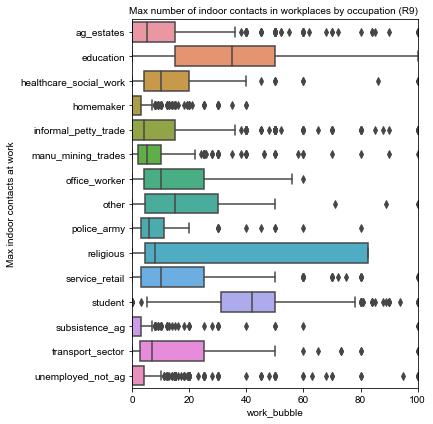

In [20]:

fig, ax = plt.subplots (figsize = (6, 6))

#plot 
sns.set_style("white")
sns.boxplot(x="work_bubble", 
            y="occ4", 
            data=ordered_r9, 
           ax=ax)
ax.set_title("Max number of indoor contacts in workplaces by occupation (R9)", loc='right', fontsize=10)
ax.set_ylabel('Max indoor contacts at work')
plt.tight_layout()
plt.xlim([0, 100])
plt.savefig(path_boxplots+'work_bubble_max.png', dpi=300, facecolor="white")


## Census comparison

In [76]:
# Compare to the ones that robbie generated in the census, should follow same distribution 
path_census_input = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/06_Data and Modelling/thesis_data/model_input/'
# load data (replace with your own dataset)
census = pd.read_stata(path_census_input+'census_bubble_size_check.dta')
census.info()

census.to_csv(path_census_input+'sophie_version.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654688 entries, 0 to 654687
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   v1               654688 non-null  int32  
 1   person_id        654688 non-null  int32  
 2   age              654688 non-null  int8   
 3   sex              654688 non-null  object 
 4   household_id     654688 non-null  int32  
 5   workplace_id     654688 non-null  object 
 6   district_id      654688 non-null  int8   
 7   economic_status  654688 non-null  object 
 8   school_goers     654688 non-null  int8   
 9   count_bubbles    654688 non-null  float32
 10  tag              654688 non-null  float32
 11  bubble_size      654688 non-null  float32
dtypes: float32(3), int32(3), int8(3), object(3)
memory usage: 31.8+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654688 entries, 0 to 654687
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   v1               654688 non-null  int32   
 1   person_id        654688 non-null  int32   
 2   age              654688 non-null  int8    
 3   sex              654688 non-null  object  
 4   household_id     654688 non-null  int32   
 5   workplace_id     654688 non-null  object  
 6   district_id      654688 non-null  int8    
 7   economic_status  654688 non-null  category
 8   school_goers     654688 non-null  int8    
 9   count_bubbles    654688 non-null  float32 
 10  tag              654688 non-null  float32 
 11  bubble_size      654688 non-null  float32 
dtypes: category(1), float32(3), int32(3), int8(3), object(2)
memory usage: 27.5+ MB


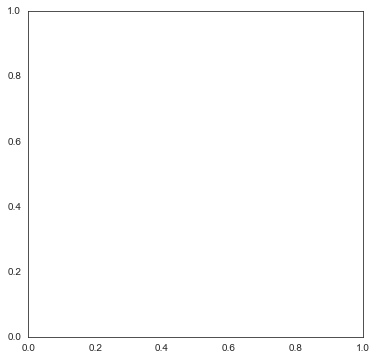

In [78]:
fig, ax = plt.subplots (figsize = (6, 6))

ordered_census['economic_status'] = pd.Categorical(ordered_census['economic_status'], categories=sorted(census['economic_status'].unique()), ordered=True)

# Calculate the mean of 'work_bubble' for each 'occupation'
occupation_means = ordered_census.groupby('economic_status')['bubble_size'].mean().sort_values(ascending=False)


# Reorder the occupations based on the calculated means
ordered_census = census.copy()
ordered_census['economic_status'] = pd.Categorical(ordered_census['economic_status'], categories=occupation_means.index, ordered=True)
ordered_census.info()


In [81]:

# keep only the unique bubble sizes, so collapse to the first workplace Id for each group
ordered_census_collapsed = ordered_census.groupby(['workplace_id']).first().reset_index()
ordered_census_collapsed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28376 entries, 0 to 28375
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   workplace_id     28376 non-null  object  
 1   v1               28376 non-null  int32   
 2   person_id        28376 non-null  int32   
 3   age              28376 non-null  int8    
 4   sex              28376 non-null  object  
 5   household_id     28376 non-null  int32   
 6   district_id      28376 non-null  int8    
 7   economic_status  28376 non-null  category
 8   school_goers     28376 non-null  int8    
 9   count_bubbles    28376 non-null  float32 
 10  tag              28376 non-null  float32 
 11  bubble_size      28376 non-null  float32 
dtypes: category(1), float32(3), int32(3), int8(3), object(2)
memory usage: 1.2+ MB


/opt/anaconda3/envs/covid19_abm/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


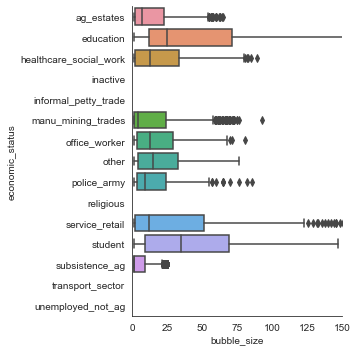

In [90]:

#plot 
sns.set_style("white")
sns.catplot(x="bubble_size", 
            y="economic_status", 
            data=ordered_census_collapsed, 
            kind='box',
           ax=ax)
ax.set_title("Max number of indoor contacts in workplaces by occupation (census)", loc='right', fontsize=10)
ax.set_ylabel('Max indoor contacts at work')
plt.tight_layout()
plt.xlim([0, 150])
plt.savefig(path_boxplots+'census_work_bubble_max.png', dpi=300)

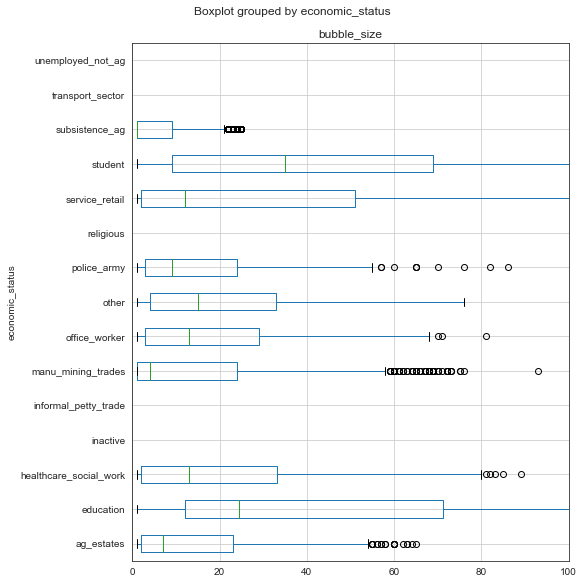

In [88]:

census_group_for_plot = ordered_census_collapsed[~ordered_census_collapsed['economic_status'].isin(['inactive', 'unemployed_not_ag', 'informal_petty_trade', 'religious', 'transport_sector'])]

fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.subplots(1)
census_group_for_plot.boxplot(by='economic_status', column=['bubble_size'], vert=False, ax=ax)
ax.set_xlim([0, 100])
plt.savefig(path_boxplots+"robbie_boxplot_replication.png")



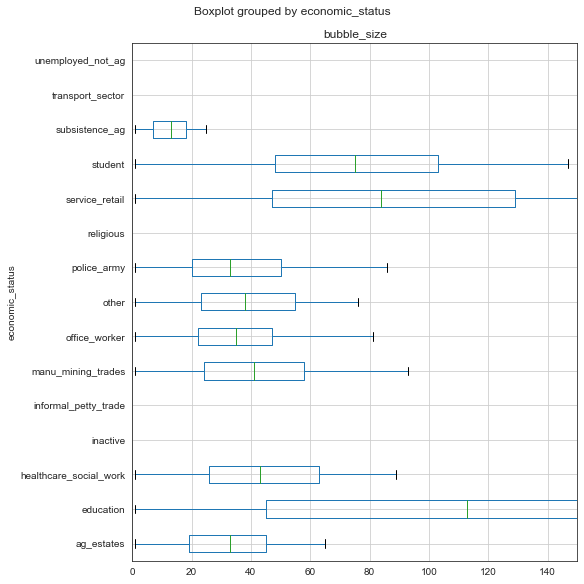

In [65]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
ax = fig.subplots(1)
census_group_for_plot.boxplot(by='economic_status', column=['bubble_size'], vert=False, ax=ax)
ax.set_xlim([0, 150])
plt.savefig(path_boxplots+"robbie_boxplot_mydata_format.png")

### 2. Community bubbles by age

In [ ]:

fig, ax = plt.subplots (figsize = (6, 6))

# Reorder it following the values of the first value:
ordered_r9 = r9.sort_values(by='comm_bubble')

#plot 
sns.boxplot(x="comm_bubble", 
            y="site_type", 
            data=r9, 
           ax=ax)
ax.set_title("Max number of contacts in community space by age", loc='right', fontsize=10)
ax.set_ylabel('Max contacts in community')
plt.tight_layout()
plt.xlim([0, 250])
plt.savefig(path_boxplots+'com_bubble_max.png', dpi=300)


### 3. Transport bubbles by site type 

In [ ]:

fig, ax = plt.subplots (figsize = (6, 6))

# Reorder it following the values of the first value:
med_trans_val = r9.groupby(by=['site_type'])['transit_bubble'].median().iloc[::-1].index

#plot 
sns.boxplot(x="transit_bubble", 
            y="site_type",
            data=r9,
            order=med_trans_val, 
            ax=ax)
ax.set_title("Max number of contacts in transit by site type", loc='right', fontsize=10)
ax.set_ylabel('Max indoor contacts at work')
plt.tight_layout()
plt.xlim([0, 40])
plt.savefig(path_boxplots+'trans_bubble_max.png', dpi=300)


### 4. School bubbles by gender

In [ ]:

fig, ax = plt.subplots (figsize = (6, 6))

# Reorder it following the values of the first value:
ordered_r9 = r9.sort_values(by='school_bubble')

#plot 
sns.boxplot(x="school_bubble", 
            y="gender_9", 
            data=ordered_r9, 
           ax=ax)
ax.set_title("Max number of contacts in school by occupation", loc='right', fontsize=10)
ax.set_ylabel('Max indoor contacts at school')
plt.tight_layout()
plt.xlim([0, 100])
plt.savefig(path_boxplots+'school_bubble_max.png', dpi=300)


In [ ]:

# create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))
# plot a boxplot in each subplot
sns.boxplot(x="tot_contacts_yest", y="occ_2", data=r9, ax=axes[1,1])
sns.boxplot(x="tot_contacts_yest", y="age_5", data=r9, ax=axes[0,1])
sns.boxplot(x="tot_contacts_yest", y="gender_9", data=r9, ax=axes[0,0])
sns.boxplot(x="ses_5", y="tot_contacts_yest", data=r9, ax=axes[1,0])

# set titles for each subplot
axes[0,0].set(title="by Gender", ylabel='gender', xlabel='no. contacts', xlim=[0,50])
axes[0,1].set(title="by Age",  ylabel='age', xlabel='no. contacts', xlim=[0,50])
axes[1,0].set(title="by Socio-economic Status",  xlabel='ses', ylabel='no. contacts', ylim=[0,50])
axes[1,1].set(title="by Occupation",  ylabel='occupation', xlabel='no. contacts', xlim=[0,50])
ax.tick_params(axis='y', labelsize=12)

# add overall title to the group of subplots
fig.suptitle("Number of self-reported contacts over all places (post-lockdown) by subgroup on weekdays \n Source: Manicaland R8 - collected July 2022-Feb 2023 ", fontsize=16, y=1.05)




# use adjust text function 
plt.tight_layout()
# export
plt.savefig(path_boxplots+'boxplots_yest_contacts_by_subgroup.png', dpi=300, bbox_inches='tight')


### Distribution of contacts by day to see the variation

In [ ]:

fig, ax = plt.subplots (figsize = (6, 6),facecolor='white')

#plot 
sns.boxplot(x="day_contacts", 
            y="tot_contacts_yest", 
            data=r9,
           ax=ax)
ax.set_title("Distribution of contacts by day for each day except saturday", loc='right', fontsize=10)
ax.set_ylabel('Distribution of contacts')
plt.tight_layout()
plt.xlim([0.5, 6.5])
plt.ylim([0,50])
plt.savefig(path_boxplots+'distribution_of_contacts.png', dpi=300)


In [ ]:
# ideally i would add a column to the plot above but for the moment here is saturday 
#plot 
sns.boxplot(y="tot_contacts_sat", 
            x="day_contacts", 
            data=r9,
            ax=ax)
ax.set_title("Distribution of contacts by day for saturday", loc='right', fontsize=10)
ax.set_ylabel('Distribution of contacts')
plt.tight_layout()
#plt.xlim([])
#plt.ylim([0,50])
plt.savefig(path_boxplots+'distribution_of_contacts_sat.png', dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from CSV
df = pd.read_csv(path_starplots+'star_plot_week.csv')  
df.head()

In [ ]:

# Extract data from DataFrame
days_of_week = df['Day'].tolist()
p50 = df['p50'].tolist()
p25 = df['p25'].tolist()
p75 = df['p75'].tolist()

# Number of categories
num_categories = len(days_of_week)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Close the plot
p50 += p50[:1]
angles += angles[:1]

#create base figure
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True), facecolor='white')

# Create radar plot of the p50 vals
ax.plot(angles, p50, color='skyblue', alpha=0.3)
ax.fill(angles, p50, color='skyblue', alpha=0.5, label='50th percentile')

# Add median lines for p75
medians_max = ax.plot(angles, p75 + [p75[0]], color='purple', alpha=0.3 )
ax.fill_between(angles, p75 + [p75[0]], color='purple', alpha=0.3, label='75th percentile')

# Add median lines for p25
medians_min = ax.plot(angles, p25 + [p25[0]], color='green', alpha=0.3 )
ax.fill_between(angles, p25 + [p25[0]], color='green', alpha=0.3, label='25th percentile')


# Set labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(days_of_week, ha='center')

# Add text annotations for each day
for angle, label, value in zip(angles[:-1], days_of_week, p50):
    ax.text(angle, value, f'{value}', ha='center', va='center')
    
# Replicate for p75
for angle, label, value in zip(angles[:-1], days_of_week, p75):
    ax.text(angle, value, f'{value}', ha='center', va='center')
    
# Replicate for p25
for angle, label, value in zip(angles[:-1], days_of_week, p25):
    ax.text(angle, value, f'{value}', ha='center', va='center')

# Remove numeric labels for the y-axis
ax.set_yticklabels([])

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.title('Total Contacts by Day of the Week (IQRs)')
plt.savefig(path_starplots+'distribution_of_contacts_daily.png', dpi=300)


In [ ]:
# do one like the above for different occupations

df = pd.read_csv(path_starplots+'star_plot_occupation.csv')  
df.head()

In [ ]:

# Extract data from DataFrame
occupation = df['occupation'].tolist()
p50 = df['p50'].tolist()
p25 = df['p25'].tolist()
p75 = df['p75'].tolist()

# Number of categories
num_categories = len(occupation)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Close the plot
p50 += p50[:1]
angles += angles[:1]

#create base figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), facecolor='white')

# Create radar plot of the p50 vals
ax.plot(angles, p50, color='skyblue', alpha=0.3)
ax.fill(angles, p50, color='skyblue', alpha=0.5, label='50th percentile')

# Add median lines for p75
medians_max = ax.plot(angles, p75 + [p75[0]], color='purple', alpha=0.3 )
ax.fill_between(angles, p75 + [p75[0]], color='purple', alpha=0.3, label='75th percentile')

# Add median lines for p25
medians_min = ax.plot(angles, p25 + [p25[0]], color='green', alpha=0.3 )
ax.fill_between(angles, p25 + [p25[0]], color='green', alpha=0.3, label='25th percentile')


# Set labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(occupation, ha='center') 
# need to somehow make these non overlapping

# Add text annotations for each occupation
for angle, label, value in zip(angles[:-1], occupation, p50):
    ax.text(angle, value, f'{value}', ha='center', va='center')
    
# # Replicate for p75
# for angle, label, value in zip(angles[:-1], occupation, p75):
#     ax.text(angle, value, f'{value}', ha='center', va='center')
    
# # Replicate for p25
# for angle, label, value in zip(angles[:-1], occupation, p25):
#     ax.text(angle, value, f'{value}', ha='center', va='center')

# Remove numeric labels for the y-axis
ax.set_yticklabels([])

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1.3, 1))

# Display the plot
plt.title('Total Contacts by Occupation - every day except saturday (IQRs)')
plt.savefig(path_starplots+'distribution_of_contacts_occupation.png', dpi=300)


In [ ]:
# and now do a star plot for each occupational numbers for different districts. 
# so around the circle are the 60 districts, 
# and individual occupations are either plotted on top of eachother or separately


df = pd.read_excel(path_starplots+'occ_by_dist_perc.xls')  
df.head()

In [ ]:

# Extract data from DataFrame
district = df['district_n'].tolist()
not_working = df['Not working, inactive, not in universe'].tolist()
students = df['Current Students'].tolist()
homemakers = df['Homemakers/Housework'].tolist()
office_workers= df['Office workers'].tolist()
service_workers=df['Service Workers'].tolist()
agri_workers=df['Agriculture Workers'].tolist()
industry_workers=df['Indusrtry Workers'].tolist()
army=df['In the army'].tolist()
disabled=df['Disabled and not working'].tolist()

# Number of categories
num_categories = len(district)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Close the plot
service_workers += service_workers[:1]
angles += angles[:1]

#create base figure
fig, ax = plt.subplots(figsize=(9.5, 6), subplot_kw=dict(polar=True,), facecolor='white')

# Create radar plot of the service_workers vals
ax.plot(angles, service_workers, color='yellow', alpha=0.3)
ax.fill(angles, service_workers, color='yellow', alpha=0.5, label='service workers')

# Add line for ag workers
p_agworkers = ax.plot(angles, agri_workers + [agri_workers[0]], color='green', alpha=0.3 )
ax.fill_between(angles, agri_workers + [agri_workers[0]], color='green', alpha=0.3, label='agri workers')

# Add line for students
p_students = ax.plot(angles, students + [students[0]], color='purple', alpha=0.3 )
ax.fill_between(angles, students + [students[0]], color='purple', alpha=0.3, label='students')

# Add line for unemployed
p_not_working = ax.plot(angles, not_working + [not_working[0]], color='skyblue', alpha=0.3 )
ax.fill_between(angles, not_working + [not_working[0]], color='skyblue', alpha=0.3, label='unemployed')

# Add line for industry workers
p_ind_workers = ax.plot(angles, industry_workers + [industry_workers[0]], color='red', alpha=0.3 )
ax.fill_between(angles, industry_workers + [industry_workers[0]], color='red', alpha=0.3, label='industry workers')

# Add line for homemakers
p_homemakers = ax.plot(angles, homemakers + [homemakers[0]], color='orange', alpha=0.3 )
ax.fill_between(angles, homemakers + [homemakers[0]], color='orange', alpha=0.3, label='homemakers')


# Set labels for each category
ax.set_xticks(angles[:-1])
ax.set_xticklabels(district, ha='center') 
# need to somehow make these non overlapping


# Remove numeric labels for the y-axis
ax.set_yticklabels([])

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1))

# Display the plot
plt.title('% of Population in each Occupation - for 60 districts, Zimbabwe')
plt.savefig(path_starplots+'distribution_of_occupation_district.png', dpi=300)
